In [1]:
import sys
import numpy
import time
import matplolib
from matplotlib import pyplot
sys.path.append('../')
sys.path.append('../../../../redundant_calibration/code/')

In [2]:
from SCAR.SkyModel import analytic_visibilities
from gain_variance_simulation import get_observations

from skymodel import SkyRealisation
from radiotelescope import RadioTelescope
from radiotelescope import beam_width

In [3]:
position_path = "../Data/MWA_All_Coordinates_Cath.txt"
frequency_range = numpy.linspace(135, 165, 2) * 1e6

telescope = RadioTelescope(load=True, path=position_path)
source_population = SkyRealisation(sky_type = 'random', seed = 0)

In [4]:
baseline_table = numpy.zeros((telescope.baseline_table.number_of_baselines, 7, len(frequency_range)))
baseline_table[:, 2] = telescope.baseline_table.u(frequency_range)
baseline_table[:, 3] = telescope.baseline_table.v(frequency_range)
sigma = beam_width(150e6)

In [5]:
t0 = time.perf_counter()
obs, ideal, analytic= analytic_visibilities(baseline_table, frequency_range, noise_param=[False], 
                                sky_model=['background'], beam = ['gaussian',sigma, sigma], seed = 0 )
t1 = time.perf_counter()
print(t1-t0)

38.503918420057744


In [6]:
t0 = time.perf_counter()

splined = get_observations(source_population, telescope.baseline_table, frequency_range = frequency_range,
                           interpolation = 'spline')
t1 = time.perf_counter()
print(t1-t0)

	FFT Time = 11.357683798996732
	FFT Time = 11.477932111010887
	Sample time = 22.77130247897003
	Sample time = 23.125445327023044
34.905787243973464


In [7]:
t0 = time.perf_counter()

regular = get_observations(source_population, telescope.baseline_table, frequency_range = frequency_range,
                           interpolation = 'linear')
t1 = time.perf_counter()
print(t1-t0)

	FFT Time = 31.591493318090215
	Sample time = 0.0033219049219042063
	FFT Time = 32.36572458606679
	Sample time = 0.0033763570245355368
64.9199725020444


<IPython.core.display.Javascript object>


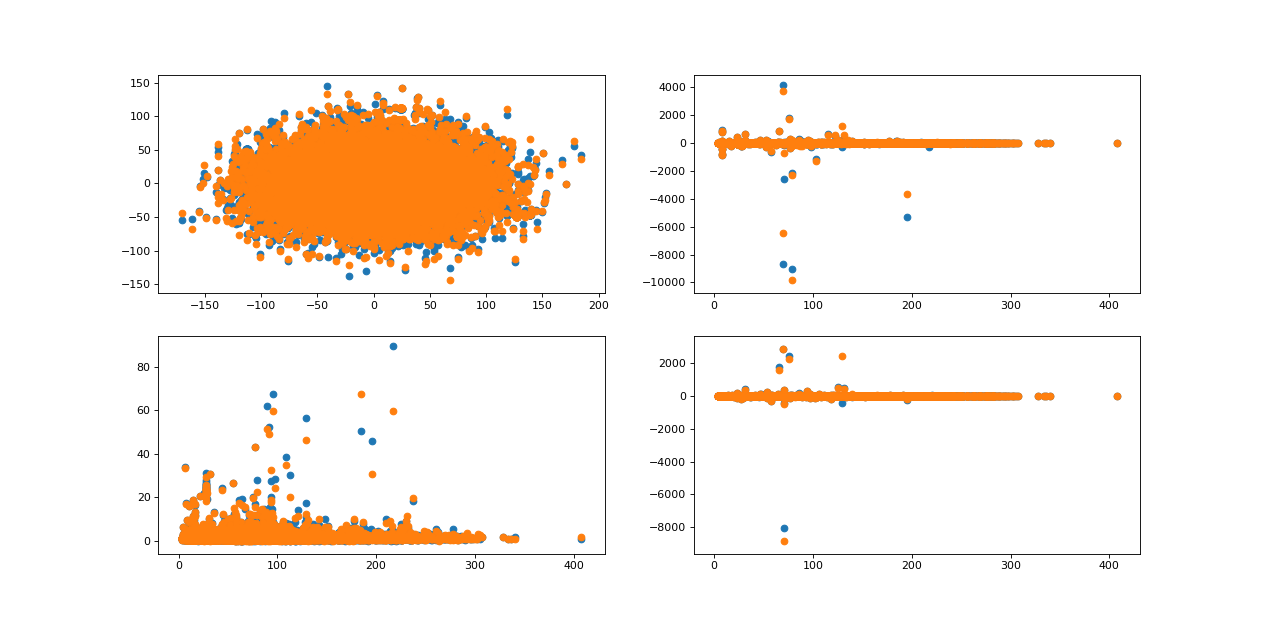

In [22]:
%matplotlib notebook
length = numpy.sqrt(baseline_table[:, 2]**2 + baseline_table[:, 3]**2)

figure = pyplot.figure(figsize = (16,8))
real_axes = figure.add_subplot(2,2,1)
imag_axes = figure.add_subplot(2,2,2)
amp_axes = figure.add_subplot(2,2,3)
phas_axes = figure.add_subplot(2,2,4)


real_axes.scatter(numpy.real(analytic), numpy.real(numpy.array(splined).T))
real_axes.scatter(numpy.real(analytic), numpy.real(regular))

imag_axes.scatter(length, numpy.imag(analytic - numpy.array(splined).T)/numpy.imag(analytic))
imag_axes.scatter(length, numpy.imag(analytic - regular)/numpy.imag(analytic))

amp_axes.scatter(length, numpy.abs(analytic - numpy.array(splined).T)/numpy.abs(analytic))
amp_axes.scatter(length, numpy.abs(analytic - regular)/numpy.abs(analytic))

phas_axes.scatter(length, numpy.angle(analytic - numpy.array(splined).T)/numpy.angle(analytic))
phas_axes.scatter(length, numpy.angle(analytic - regular)/numpy.angle(analytic))
